In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline  

In [2]:
v = np.random.random((3))
m = np.random.random((2,3))

v.dot(m.T) 

array([ 1.68641405,  0.85580462])

In [3]:
v

array([ 0.77661706,  0.67929272,  0.99170275])

In [4]:
m

array([[ 0.25175836,  0.78009635,  0.96902065],
       [ 0.20903394,  0.08015226,  0.64436491]])

In [5]:
hist = pd.read_csv('NN_data/image_histograms.txt',sep=' ',header=None)
act = pd.read_csv('NN_data/sample_histogram.txt',sep=' ',header=None)

In [6]:
hist.head()

0      1      2      3      4   \
0  {0000591D-DAF1-4A20-9588-1CB5267BD034}.jpg   7592   1085   1768   3662   
1  {00047801-97BC-4385-A3DB-F70CB59FCFAD}.jpg  33518   4655   6377  44054   
2  {000BEEF7-4E0A-4CCF-BC27-CD97A75B3BF8}.jpg  16873  31661  36461  29759   
3  {000D136D-9A68-47DD-9E74-C205B286E15F}.jpg  46334  15421  16733  23438   
4  {000DF1BF-20BA-4753-AC52-896BFF204E08}.jpg   7612  59546  69207  25334   

      5       6      7      8      9   ...      15     16     17     18  \
0  16970  105784  14004  15135   8027  ...    1709  17677   8176   2057   
1  33666   26911  17152   6167  36870  ...    5731    644  38343    876   
2  20083   11139   6381  14143  16655  ...    7802  14751  23351  42115   
3  11845   10375   8382  33972  60938  ...    8497  25014  74932  26237   
4   3473     877    604    847  15856  ...     184    105  13856  41446   

      19     20     21    22    23     24  
0   7020  73033  56004   351  1301  18058  
1   7332  92038  30683  2507   408    313  
2  34773  22072  13294  8906  6460  15529  
3  14425   7262   8149  7795  9684  18016  
4  49044  52827   9982   269    69      7  

[5 rows x 25 columns]

In [7]:
act.head()

0       1      2      3      4   \
0  {006BE863-6362-4209-ABCB-8DA090B910DA}.jpg  130140  69103  66230  79079   

      5      6      7      8       9   ...       15     16      17     18  \
0  87106  67219  85810  87313  138146  ...    75636  82329  142807  87913   

       19     20     21     22     23     24  
0  101501  85764  49126  61232  65753  77904  

[1 rows x 25 columns]

In [8]:
dist = np.zeros((len(hist.index)))
dist_norm = np.zeros((len(hist.index)))

In [9]:
hist_vecs = np.array(hist.values[:,1:]).astype(np.float32)
hist_vecs_norm = np.copy(hist_vecs).astype(np.float32)

In [11]:
hist_vecs.shape

(97, 24)

In [12]:
act_vec = np.array(act.values[:,1:]).astype(np.float32)
act_vec_norm = act_vec/np.linalg.norm(act_vec).astype(np.float32)
for i in range(hist_vecs[:,0].size):    
    norm= np.linalg.norm(hist_vecs[i]) 
    hist_vecs_norm[i] = hist_vecs[i]/norm  

In [13]:
print(act_vec)
print(act_vec_norm)

[[ 130140.   69103.   66230.   79079.   87106.   67219.   85810.   87313.
   138146.   80577.   80459.   88697.   64126.   62030.   75636.   82329.
   142807.   87913.  101501.   85764.   49126.   61232.   65753.   77904.]]
[[ 0.30492178  0.16191033  0.15517882  0.18528439  0.20409188  0.15749606
   0.20105532  0.20457689  0.32368007  0.18879424  0.18851776  0.20781964
   0.15024908  0.14533809  0.17721733  0.19289923  0.33460093  0.2059827
   0.23781978  0.20094754  0.11510364  0.14346835  0.15406118  0.18253133]]


In [14]:
for i in range(hist_vecs[:,0].size):    
    dist[i] = np.linalg.norm(hist_vecs[i]-act_vec)    
    dist_norm[i] = np.linalg.norm(hist_vecs_norm[i]-act_vec_norm)

In [15]:
top = np.argmin(dist)
top_val = np.min(dist)
top_norm = np.argmin(dist_norm)
top_norm_val = np.min(dist_norm)

In [16]:
print('before normalization: %s,%s %f' % (act.values[0,0], hist.values[top,0], top_val))
print('after normalization: %s,%s %f' % (act.values[0,0], hist.values[top_norm,0], top_norm_val))

before normalization: {006BE863-6362-4209-ABCB-8DA090B910DA}.jpg,{02C21616-C3FD-4632-9EFA-DF83AEDDBCB0}.jpg 304096.031250
after normalization: {006BE863-6362-4209-ABCB-8DA090B910DA}.jpg,{006BE863-6362-4209-ABCB-8DA090B910DA}.jpg 0.041891


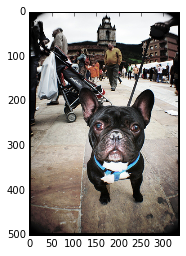

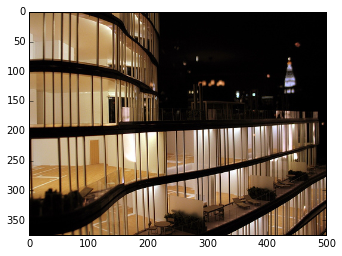

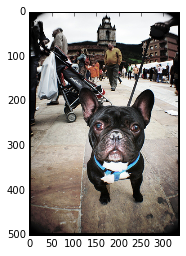

In [17]:
img1=plt.imread(str('NN_data/images/'+act.values[0,0]))
plt.imshow(img1)
plt.show()
img1=plt.imread(str('NN_data/images/'+hist.values[top,0]))
plt.imshow(img1)
plt.show()
img1=plt.imread(str('NN_data/images/'+hist.values[top_norm,0]))
plt.imshow(img1)
plt.show()